# Web scraping of KIA cars in Delhi

In [3]:
pip install selenium


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pandas as pd

# Setup Selenium WebDriver
driver = webdriver.Chrome() # To initialize the Chrome WebDriver
driver.get('https://www.cars24.com/buy-used-car?f=make%3A%3D%3Akia&sort=bestmatch&serveWarrantyCount=true&storeCityId=2')

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)

page_source = driver.page_source # Get the page source
driver.quit()

In [5]:
soup = BeautifulSoup(page_source, 'html.parser')

In [6]:
soup

<html lang="en-IN"><head>
<link href="https://assets.cars24.com" rel="preconnect"/>
<link href="https://fastly-production.24c.in" rel="preconnect"/>
<link href="https://connect.facebook.net" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://analytics.twitter.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://www.google.com" rel="preconnect"/>
<link href="https://www.google.co.in" rel="preconnect"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://t.co" rel="preconnect"/>
<link href="https://static.ads-twitter.com" rel="preconnect"/>
<link href="https://tracking.cars24.com" rel="preconnect"/>
<link href="https://www.googleoptimize.com" rel="preconnect"/>
<link href="https://web-sdk.smartlook.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-width, initial-sca

In [7]:
results = soup.find_all('a', {'class': 'IIJDn'})

In [8]:
len(results)

33

In [9]:
cars_data = []

In [10]:
# Loop through each listing to extract details
for result in results:
    name = result.find('h3').get_text()
    year_manufacture = result.find('h3').text.split()[0]
    km_driven = result.find('li').text
    specs = result.find('ul').find_all('li')
    fuel_type = specs[2].text
    transmission_type = specs[4].text
    price = result.find('strong').text

    # Append the car data to the list
    cars_data.append({
        'Name': name,
        'Year of Manufacture': year_manufacture,
        'Kilometers Driven': km_driven,
        'Fuel Type': fuel_type,
        'Transmission': transmission_type,
        'Price': price
    })

In [11]:
# Convert the list to a DataFrame
df_cars = pd.DataFrame(cars_data)

In [12]:
# Save the DataFrame to a CSV file
csv_file_path = 'Cars24.csv'
df_cars.to_csv(csv_file_path, index=False)

print(f"Data scraped and saved to '{csv_file_path}' successfully.")

Data scraped and saved to 'Cars24.csv' successfully.


# Data Analysis & Visualization

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Cars24.csv")

In [15]:
df

,Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,2022 KIA SELTOS HTE 1.5 DIESEL,2022,"36,166 km",Diesel,Manual,₹10.57 Lakh
1,2019 KIA SELTOS HTK PLUS 1.5,2019,"27,143 km",Petrol,Manual,₹9.86 Lakh
2,2022 KIA SONET HTX 1.0 IMT,2022,"9,526 km",Petrol,Manual,₹10.60 Lakh
3,2021 KIA SONET HTK PLUS 1.0 DCT,2021,"27,310 km",Petrol,Automatic,₹9.35 Lakh
4,2020 KIA CARNIVAL PREMIUM 2.2 7 STR,2020,"66,902 km",Diesel,Automatic,₹19.16 Lakh
5,2022 KIA SONET HTK PLUS 1.2,2022,"12,265 km",Petrol,Manual,₹8.77 Lakh
6,2020 KIA SONET HTK PLUS 1.5,2020,"67,883 km",Diesel,Manual,₹8.33 Lakh
7,2019 KIA SELTOS GTX PLUS DCT 1.4 PETROL,2019,"24,009 km",Petrol,Automatic,₹14.78 Lakh
8,2019 KIA SELTOS GTX 1.4 PETROL DUAL TONE,2019,"11,707 km",Petrol,Manual,₹12.49 Lakh
9,2022 KIA SONET HTX 1.0 IMT,2022,"29,811 km",Petrol,Manual,₹10.59 Lakh


In [16]:
# Get the shape of the DataFrame
df.shape

(33, 6)

In [17]:
# Prints the data types of the columns in given DataFrame.
print(df.dtypes)

Name                   object
Year of Manufacture     int64
Kilometers Driven      object
Fuel Type              object
Transmission           object
Price                  object
dtype: object


In [18]:
# first 10 rows of the DataFrame
df.head(10)

,Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,2022 KIA SELTOS HTE 1.5 DIESEL,2022,"36,166 km",Diesel,Manual,₹10.57 Lakh
1,2019 KIA SELTOS HTK PLUS 1.5,2019,"27,143 km",Petrol,Manual,₹9.86 Lakh
2,2022 KIA SONET HTX 1.0 IMT,2022,"9,526 km",Petrol,Manual,₹10.60 Lakh
3,2021 KIA SONET HTK PLUS 1.0 DCT,2021,"27,310 km",Petrol,Automatic,₹9.35 Lakh
4,2020 KIA CARNIVAL PREMIUM 2.2 7 STR,2020,"66,902 km",Diesel,Automatic,₹19.16 Lakh
5,2022 KIA SONET HTK PLUS 1.2,2022,"12,265 km",Petrol,Manual,₹8.77 Lakh
6,2020 KIA SONET HTK PLUS 1.5,2020,"67,883 km",Diesel,Manual,₹8.33 Lakh
7,2019 KIA SELTOS GTX PLUS DCT 1.4 PETROL,2019,"24,009 km",Petrol,Automatic,₹14.78 Lakh
8,2019 KIA SELTOS GTX 1.4 PETROL DUAL TONE,2019,"11,707 km",Petrol,Manual,₹12.49 Lakh
9,2022 KIA SONET HTX 1.0 IMT,2022,"29,811 km",Petrol,Manual,₹10.59 Lakh


In [19]:
# Describe the dataframe including all columns
df.describe(include = "all")

,Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
count,33,33.000000,33,33,33,33
unique,22,NaN,33,2,2,32
top,2022 KIA SONET HTX 1.0 IMT,NaN,"36,166 km",Petrol,Manual,₹9.86 Lakh
freq,5,NaN,1,28,28,2
mean,NaN,2020.969697,NaN,NaN,NaN,NaN
std,NaN,1.286586,NaN,NaN,NaN,NaN
min,NaN,2019.000000,NaN,NaN,NaN,NaN
25%,NaN,2020.000000,NaN,NaN,NaN,NaN
50%,NaN,2022.000000,NaN,NaN,NaN,NaN
75%,NaN,2022.000000,NaN,NaN,NaN,NaN


In [20]:
# Prints information about the given DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 33 non-null     object
 1   Year of Manufacture  33 non-null     int64 
 2   Kilometers Driven    33 non-null     object
 3   Fuel Type            33 non-null     object
 4   Transmission         33 non-null     object
 5   Price                33 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.7+ KB


In [21]:
# count of each fuel type in the given dataframe.
df['Fuel Type'].value_counts()

Fuel Type
Petrol    28
Diesel     5
Name: count, dtype: int64

In [22]:
df['Transmission'].value_counts()

Transmission
Manual       28
Automatic     5
Name: count, dtype: int64

In [23]:
df['Year of Manufacture'].unique()

array([2022, 2019, 2021, 2020, 2023])

In [24]:
df.isnull().sum()
df.isna().any()

Name                   False
Year of Manufacture    False
Kilometers Driven      False
Fuel Type              False
Transmission           False
Price                  False
dtype: bool

In [25]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['Year of Manufacture']
Categorical variables: ['Name', 'Kilometers Driven', 'Fuel Type', 'Transmission', 'Price']


In [26]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 5
Number of numerical variables: 1


In [27]:
df.duplicated().sum()

0

In [28]:
df.columns

Index(['Name', 'Year of Manufacture', 'Kilometers Driven', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

In [29]:
# plt.figure(figsize=(10, 6))
# df['Year of Manufacture'].hist(bins=5, edgecolor='black')
# plt.title('Distribution of Manufacturing Years')
# plt.xlabel('Year of Manufacture')
# plt.ylabel('Count')
# plt.show()

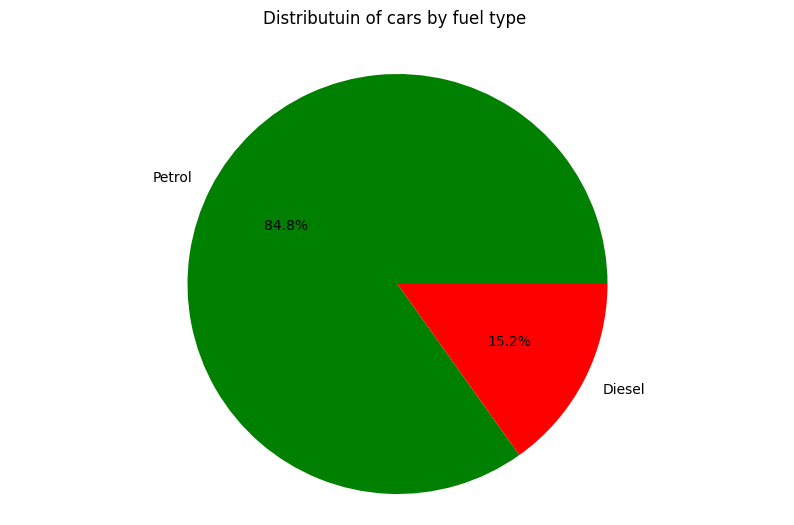

In [30]:
fuel_counts = df['Fuel Type'].value_counts().tolist()
labels = ["Petrol","Diesel"]

plt.figure(figsize=(10, 6))
plt.pie(fuel_counts, labels=labels, autopct='%1.1f%%' , colors=['green','red'])
plt.title('Distributuin of cars by fuel type \n')
plt.axis('equal')
plt.show()

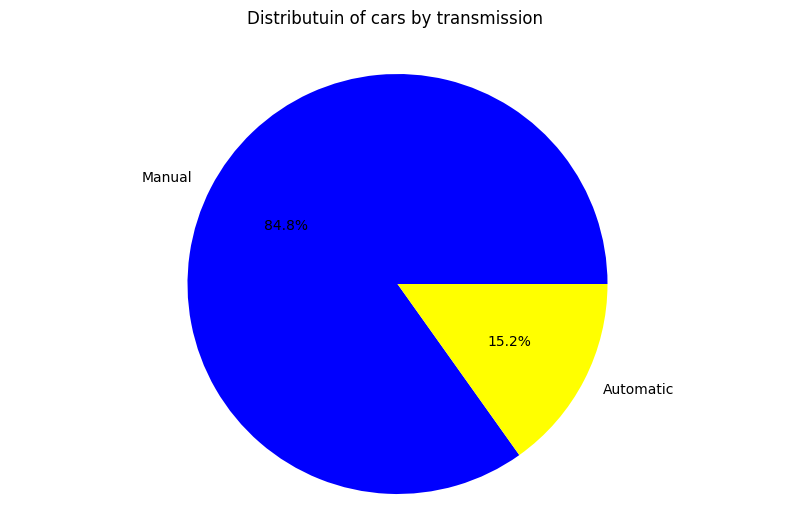

In [31]:
transmission_counts = df['Transmission'].value_counts()
labels = ["Manual","Automatic"]

plt.figure(figsize=(10, 6))
plt.pie(transmission_counts, labels=labels, autopct='%1.1f%%' , colors=['blue','yellow'])
plt.title('Distributuin of cars by transmission \n')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

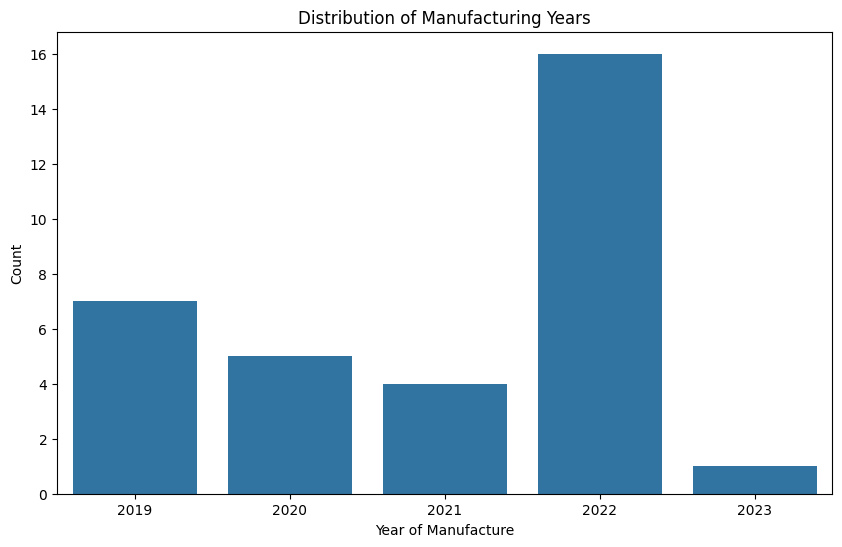

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year of Manufacture', data=df)
plt.title('Distribution of Manufacturing Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

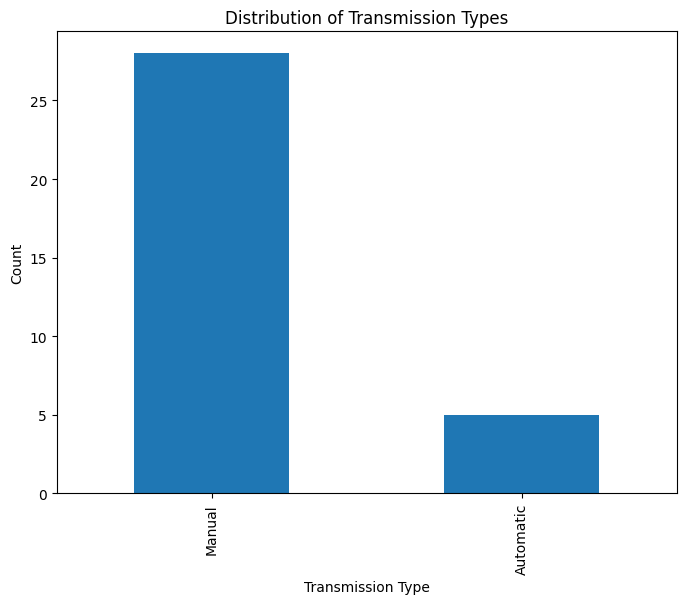

In [33]:
plt.figure(figsize=(8, 6))
df['Transmission'].value_counts().plot(kind='bar')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

In [34]:
df['Price'] = df['Price'].str.replace('₹', '').str.replace('Lakh', '').astype(float)


In [35]:
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(' km', '').str.replace(',', '').astype(int)

Text(0, 0.5, 'Price (Lakh ₹)')

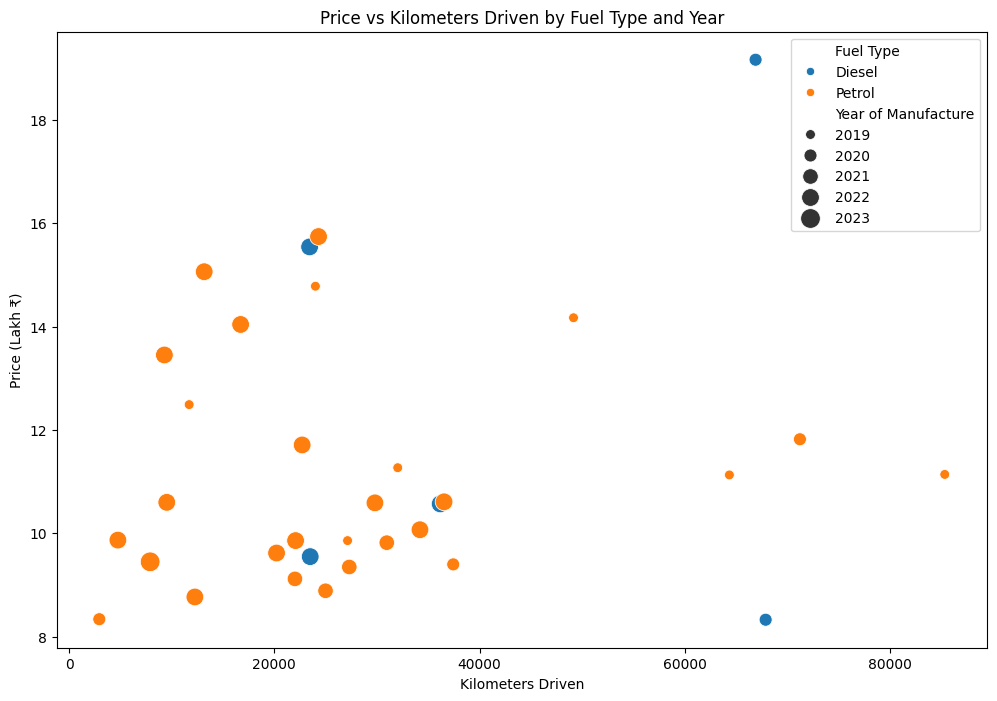

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Kilometers Driven', y='Price', hue='Fuel Type', size='Year of Manufacture', sizes=(50, 200))
plt.title('Price vs Kilometers Driven by Fuel Type and Year')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (Lakh ₹)')

Text(0.5, 1.0, 'Correlation Heatmap')

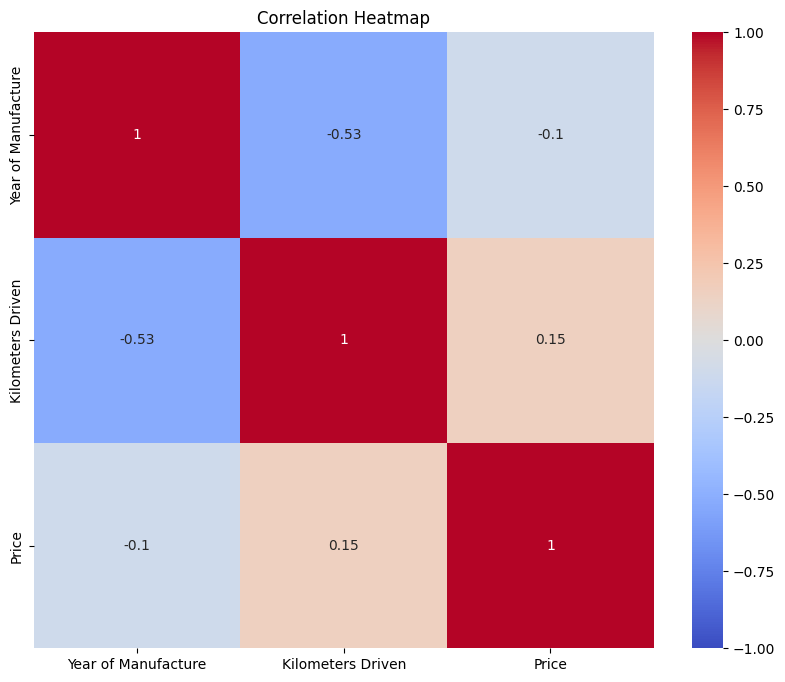

In [37]:
numeric_df = df[['Year of Manufacture', 'Kilometers Driven', 'Price']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')